## Nulos a gestionar
- **Price** -> tiene 40 nulos(2%)
- **Discount** -> tiene 40 nulos(2%)
- **Payment Method** -> tiene 1753 nulos (87.65%). 
- **Shipping Method** -> tiene 1753 nulos (87.65%).
- **Customer Age** -> tiene 40 nulos (2%)
- **Cupon Used** -> tiene 1753 nulos (87.65%)

In [42]:
# Tratamiento de datos
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_o = pd.read_csv('../data/data_limpios.csv') # df_o es el original

In [3]:
df = df_o.copy()

In [4]:
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [5]:
df_nulos = df.loc[:, df.isnull().sum() > 0]

In [6]:
df_nulos

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


## Nulos Categóricas

In [7]:
for col in df_nulos.select_dtypes(include='O').columns:
  print(col.upper())
  display(df[col].value_counts()/df.shape[0]*100)
  print('------------------------------------')

PAYMENT_METHOD


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

------------------------------------
SHIPPING_METHOD


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

------------------------------------
COUPON_USED


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

------------------------------------


In [8]:
def subplot_col_cat(dataframe):
  # Seleccionar columnas categóricas
  categorical_cols = dataframe.select_dtypes(include=['object','category']).columns
  if len(categorical_cols) == 0:
    return "No hay columnas categóricas en el DataFrame"
    
  
  # Configurar el tamaño de la figura
  num_cols = len(categorical_cols)
  rows = (num_cols + 2) // 3 # calcular número de filas necesarias para 3 columnas por fila
  fig, axes = plt.subplots(rows, 3, figsize= (15, rows*5))
  axes=axes.flatten() # convertir los ejes a un array de un 1d plano para fácil iteración. Es decir, la posición [0,0] ahora es la posición [0], la [1,0] la 3

  # Generar gráficos por cada columna categórica

  for i, col in enumerate(categorical_cols): # hacemos un enumerate para que haya un índice que vaya en concordancia con los ejes de las gráficas; gráfico 0 eje 0, etc.
    sns.countplot(data=dataframe, x = col, ax=axes[i], hue=col, palette='tab10', legend=False)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation= 90)

# Eliminar ejes sobrantes si hay menos columnas que subplots:
  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

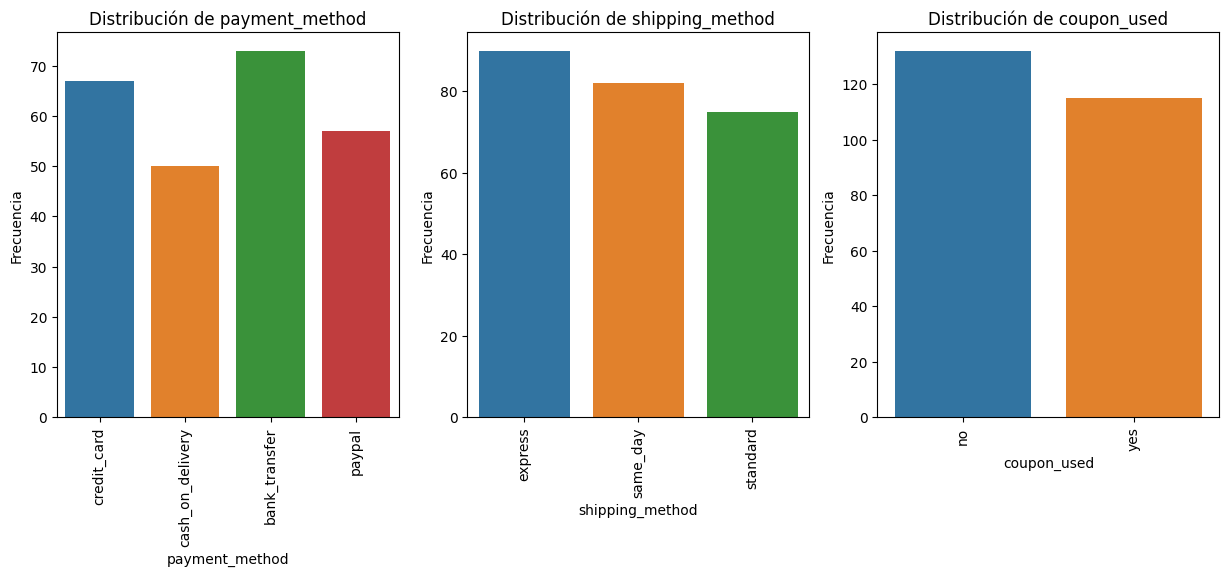

In [9]:
subplot_col_cat(df_nulos)

In [10]:
df_nulos.select_dtypes(include='object').isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

Si nos fijamos en el DataFrame, parace ser que los nulos corresponden a los ususarios que no han realizado una compra(por eso no se indicar el payment_method por ej). Vamos a comprobarlo:

In [11]:
df_nocompra = df[df['conversion']==0] # Conversion corresponda a la compra, por lo que los resgitros con 0 no han comprado
df_nocompra.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

Confirmamos que cuando no se compra todos son nulos. Si se compra hay nulos?

In [12]:
df_nocompra = df[df['conversion']==1] 
df_nocompra.isnull().mean()*100

user_id             0.000000
group               0.000000
visit_date          0.000000
conversion          0.000000
product_category    0.000000
product_id          0.000000
product_name        0.000000
quantity            0.000000
price               4.048583
discount            2.429150
total_value         0.000000
payment_method      0.000000
shipping_method     0.000000
region              0.000000
customer_age        1.214575
customer_gender     0.000000
device              0.000000
session_duration    0.000000
coupon_used         0.000000
browser             0.000000
referral_source     0.000000
conversion_str      0.000000
dtype: float64

De esta manera comprobamos que los nulos de las columnas categóricas son debido a que no se ha realizado la compra, por lo tanto, no tienen método de pago, de trasnporte ni se ha utilizado ningún cupón.

In [13]:
df.loc[:, df.select_dtypes(include='object').columns] =df.select_dtypes(include='object').fillna('no_conversion')

In [14]:
df.isnull().mean()*100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64

# Nulos numéricas

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000.0,1000.500000,577.494589,1.00,500.7500,1000.500,1500.250,2000.00
conversion,2000.0,0.123500,0.329093,0.00,0.0000,0.000,0.000,1.00
product_id,2000.0,1501.560000,287.188372,1000.00,1256.0000,1510.500,1746.500,1998.00
quantity,2000.0,0.371000,1.096339,0.00,0.0000,0.000,0.000,5.00
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
total_value,2000.0,51.754830,234.575099,0.00,0.0000,0.000,0.000,2904.07
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00
session_duration,2000.0,15.633500,8.692235,1.00,8.0000,16.000,23.000,30.00


Es posible que nos interese eliminar outliers y por lo tanto se generarán más nulos en nuestras columnas numéricas. De ahí observar los estadísticos.

## Outliers

In [16]:
def subplot_col_num(dataframe):

  col_nums = dataframe.select_dtypes(include= 'number').columns
  num_graph = len(col_nums)
  num_rows = (num_graph + 2) // 3 # calcular número de filas necesarias para 3 columnas por fila
  fig, axes = plt.subplots(num_graph, 2, figsize= (15, num_rows*5))



  for i, col in enumerate(col_nums):
    sns.histplot(data=dataframe, x = col, ax=axes[i,0], bins=200)
    axes[i,0].set_title(f"Distribución de {col}")
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel("Frecuencia")

    sns.boxplot(data=dataframe, x=col, ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot de {col}')


# Eliminar ejes sobrantes si hay menos columnas que subplots:
  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

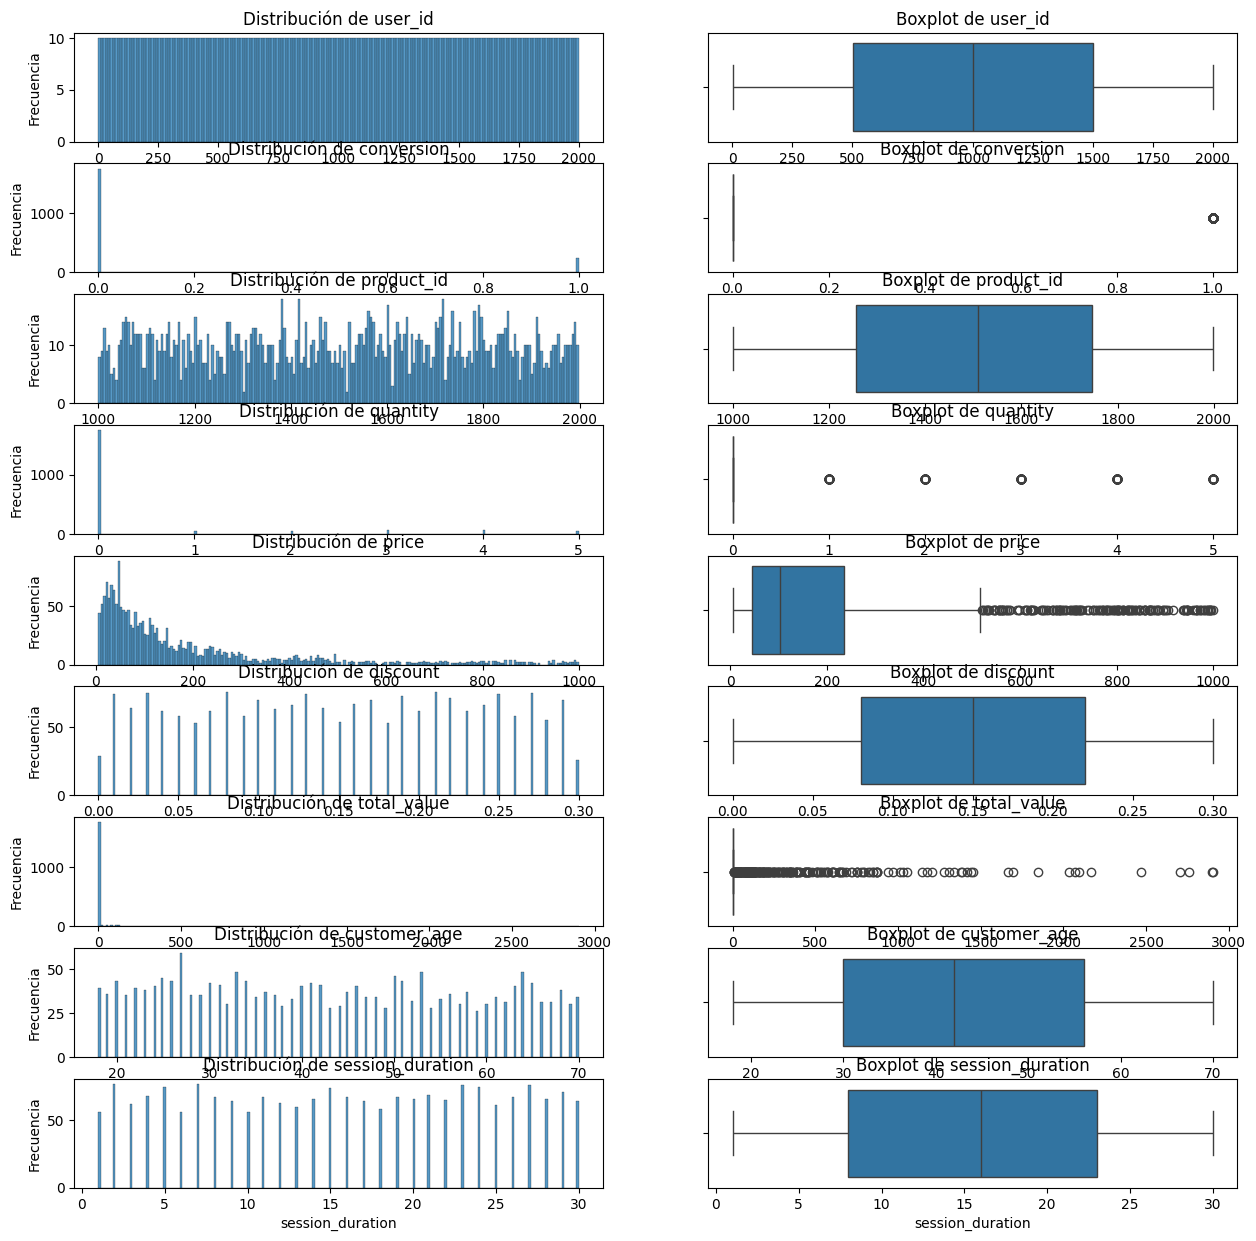

In [17]:
subplot_col_num(df)

- price tiene outliers
- total_value

In [18]:
# esta función la he realizado a través del paso a paso que he hecho a cotinuación

def calculo_ouliers(df,cols):
  for col in cols:
    q_75 = df[col].quantile(0.75)
    q_25 = df[col].quantile(0.25)
    rango_itq = q_75 - q_25
    inferior = q_25 - (rango_itq*1.5)
    superior = q_75 + (rango_itq*1.5)
    
    outliers = df[(df[col] < inferior)   |  (df[col] > superior)]
    num_outliers = len(outliers)

    por_outliers= num_outliers/df.shape[0]*100
    print(f' En la columna {col.upper()}, hay un total de {num_outliers} outliers, lo que representa un {por_outliers} %')

In [19]:
q_75 = df['price'].quantile(0.75)
q_75

np.float64(236.155)

In [20]:
q_25 = df['price'].quantile(0.25)
q_25

np.float64(46.0925)

In [21]:
rango_itq = q_75 - q_25
rango_itq

np.float64(190.0625)

In [22]:
inferior = q_25 - (rango_itq*1.5)
inferior # todo lo que esté por debajo de -239 es un outlier

np.float64(-239.00125)

In [23]:
superior = q_75 + (rango_itq*1.5)
superior # y todo lo que esté por encima de 521 también

np.float64(521.24875)

In [24]:
outliers = df[(df['price'] < inferior)   |  (df['price'] > superior)]
num_outliers = len(outliers)
num_outliers

161

In [25]:
por_outliers= num_outliers/df.shape[0]*100
print(f'Mi porcentaje de outliers es {por_outliers} %')

Mi porcentaje de outliers es 8.05 %


In [26]:
# Utilizando la función
calculo_ouliers(df, ['price', 'total_value'])

 En la columna PRICE, hay un total de 161 outliers, lo que representa un 8.05 %
 En la columna TOTAL_VALUE, hay un total de 247 outliers, lo que representa un 12.35 %


- Los nulos de price y total_value se encuentran por debajo del 5%, por lo que no es óptimo crear una nueva categoría
- Además, sus outliers son bastante altos por lo que tampoco es óptimo sustituir por la media o la mediana
- -> Hay que utilizar estadísticos avanzados

## Nulos numéricas. Segunda parte

In [27]:
df_nulos.select_dtypes(include='number').isnull().mean()*100

price           2.0
discount        2.0
customer_age    2.0
dtype: float64

In [28]:
df_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00


In [31]:
# Vamos a sustituir los valores nulos de discount por su media y los de customer_age por la mediana
df_filled_simple = df.fillna({
                  'discount' : df['discount'].mean(),
                  'customer_age' : df['customer_age'].median()


})

In [32]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
dtype: int64

In [44]:
def imputar_iterative(dataframe, lista_columnas):
  iter_imputer = IterativeImputer( max_iter= 50,
                                  random_state= 42)
  data_imputed = iter_imputer.fit_transform(dataframe[lista_columnas])
  new_col = [col + "_iterative" for col in lista_columnas]
  dataframe[new_col] = data_imputed
  return dataframe

In [52]:
def imputar_knn(dataframe, lista_columnas):
  knn_imputer = KNNImputer(n_neighbors= 5)
  data_imputed = knn_imputer.fit_transform(dataframe[lista_columnas])
  new_col = [col + "_knn" for col in lista_columnas]
  dataframe[new_col] = data_imputed
  return dataframe

In [53]:
df_filled_simple = imputar_iterative(df_filled_simple, ['price'])
df_filled_simple.sample(3)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative
843,844,b,2022-03-04,0,electronics,1132,smartphone,0,486.63,0.27,0.0,no_conversion,no_conversion,north,45.0,f,mobile,19,no_conversion,safari,paid,no,486.63
1619,1620,b,2022-02-08,1,electronics,1177,smartphone,4,884.07,0.22,2758.3,credit_card,same_day,central,42.0,f,tablet,29,yes,edge,organic,yes,884.07
1681,1682,b,2022-03-02,0,home,1170,sofa,0,204.64,0.05,0.0,no_conversion,no_conversion,south,42.0,f,tablet,24,no_conversion,edge,paid,no,204.64


In [54]:
df_filled_simple = imputar_knn(df_filled_simple, ['price'])
df_filled_simple.sample(3)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative,price_knn
748,749,b,2022-03-12,0,electronics,1539,headphones,0,249.31,0.19,0.00,no_conversion,no_conversion,west,66.0,f,desktop,1,no_conversion,chrome,organic,no,249.31,249.31
1782,1783,a,2022-01-07,0,toys,1422,puzzle,0,34.56,0.09,0.00,no_conversion,no_conversion,central,37.0,other,mobile,22,no_conversion,firefox,paid,no,34.56,34.56
109,110,a,2022-03-27,1,fashion,1185,jeans,3,148.94,0.22,348.52,bank_transfer,same_day,south,58.0,f,mobile,16,yes,chrome,paid,yes,148.94,148.94


In [55]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
price_knn            0
dtype: int64

In [ ]:
# Ahora identificiamos si nos quedamos con iterative o con knn
df_filled_simple[['price', 'price_iterative', 'price_knn']].describe().T # salen los mismos resultados por lo que no importa cuál escoger.

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.1550,998.88
price_iterative,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88
price_knn,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88


In [58]:
df_filled_simple.drop(columns=['price', 'price_iterative'], inplace=True)

In [60]:
df_filled_simple.isnull().sum()

user_id             0
group               0
visit_date          0
conversion          0
product_category    0
product_id          0
product_name        0
quantity            0
discount            0
total_value         0
payment_method      0
shipping_method     0
region              0
customer_age        0
customer_gender     0
device              0
session_duration    0
coupon_used         0
browser             0
referral_source     0
conversion_str      0
price_knn           0
dtype: int64

In [61]:
df_filled_simple.to_csv("../data/data_limpios_nonulos.csv", index=False)